First things first, let's set-up our environment:

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import *

%load_ext lab_black
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import re

plt.style.use(["seaborn-bright"])
plt.rcParams["figure.figsize"] = [20, 6]
from scipy import stats

from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus


def ConfM(x):
    y = pd.DataFrame(
        x, columns=["Predicted No", "Predicted Yes"], index=["True No", "True Yes"]
    )
    return y

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


Let's import the test and training data:

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

We want to create a random tree. Let's import the necessary libraries:




In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

This library requires we create two variables, one for the features array, and one for the response. Let's do that now.

In [18]:
train_y = np.ravel(train_data[["default.payment.next.month"]])
train_X = train_data.drop("default.payment.next.month", 1)

test_y = np.ravel(test_data[["default.payment.next.month"]])
test_X = test_data.drop("default.payment.next.month", 1)

In [37]:
# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
decision_tree = decision_tree.fit(train_X, train_y)

# Predict the response for test dataset
y_pred = decision_tree.predict(test_X)

accuracy = metrics.accuracy_score(test_y, y_pred)
accuracy = accuracy * 100
print("Accuracy: %.4g%%" % accuracy)

Accuracy: 72.2%


Confusion Matrix :
          Predicted No  Predicted Yes
True No           4448            220
True Yes           909            423
Accuracy Score : 0.8118
Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4668
           1       0.66      0.32      0.43      1332

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



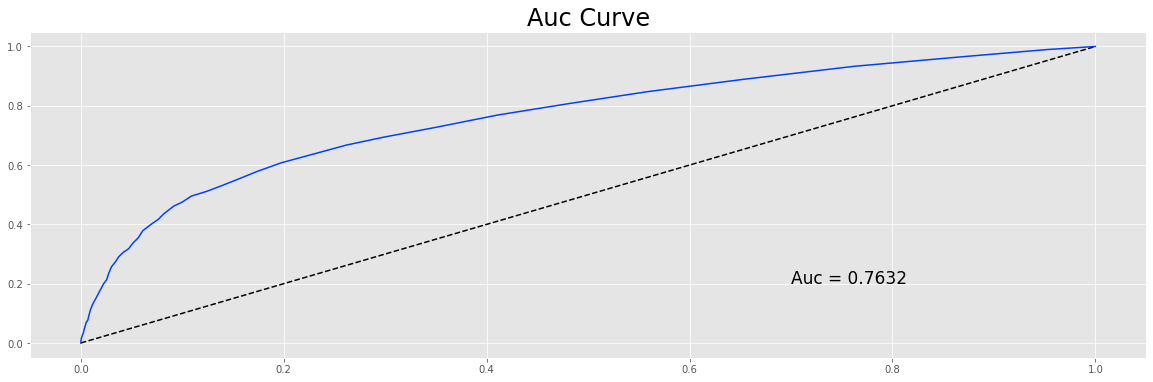

In [59]:
# The random forest model by itself
n_estimator = 50
rf = RandomForestClassifier(
    n_estimators=n_estimator, bootstrap=True, class_weight={1: 50, 0: 1}
)
rf.fit(train_X, np.ravel(train_y))
y_pred_rf = rf.predict_proba(test_X)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_rf)
auc_rf = metrics.auc(fpr_rf, tpr_rf)
y_predic_rf = rf.predict(test_X)
cm_rf = confusion_matrix(test_y, y_predic_rf)
print("Confusion Matrix :")
print(ConfM(cm_rf))
print("Accuracy Score : %.4g" % accuracy_score(test_y, y_predic_rf))
print("Report : ")
print(classification_report(test_y, y_predic_rf))
plt.figure(1)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_rf, tpr_rf, label="RF")
plt.title("ROC Curve", size=24)
plt.text(x=0.7, y=0.2, s="Auc = " + auc_rf.round(4).astype(str), size=17)
plt.show()

In [52]:
print(plt.style.available)

['seaborn-bright', 'seaborn-dark', 'seaborn-poster', 'grayscale', 'tableau-colorblind10', 'dark_background', 'seaborn-talk', 'seaborn-white', 'bmh', 'seaborn-darkgrid', 'fast', 'classic', 'seaborn-colorblind', 'ggplot', 'seaborn-muted', 'fivethirtyeight', 'seaborn-paper', 'seaborn-notebook', '_classic_test', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn', 'seaborn-whitegrid', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-deep']
